Code Reuse Session 3

In [526]:
# Import pandas library for data manipulation and analysis
import pandas as pd 
# Import train_test_split function for splitting data into training and test sets
from sklearn.model_selection import train_test_split

Code Reuse Session 3

In [527]:
# Read the mortality status dataset from CSV file
df = pd.read_csv("mortality_status.csv")
# Display the first 5 rows of the dataset
df.head()


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60,1
1,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62,1
2,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75,1
3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84,1
4,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50,1


Code Reuse Session 3

In [528]:
# Display dataset information (datatypes, non-null values)
df.info()
# Display statistical summary of the numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3984 non-null   int64  
 1   Sex                     3984 non-null   int64  
 2   T_Stage                 3984 non-null   int64  
 3   N_Stage                 3984 non-null   int64  
 4   6th_Stage               3984 non-null   int64  
 5   Differentiated          3984 non-null   int64  
 6   Grade                   3984 non-null   int64  
 7   A_Stage                 3984 non-null   int64  
 8   Tumor_Size              3984 non-null   int64  
 9   Estrogen_Status         3984 non-null   int64  
 10  Progesterone_Status     3984 non-null   int64  
 11  Regional_Node_Examined  3984 non-null   float64
 12  Reginol_Node_Positive   3984 non-null   int64  
 13  Survival_Months         3984 non-null   int64  
 14  Mortality_Status        3984 non-null   

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,3984.000000,3984.000000,3984.000000,3984.000000,3984.00000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000
mean,53.980673,0.995231,0.782631,0.436245,1.31752,0.689759,2.152610,0.977410,30.339859,0.932480,0.826556,14.371235,4.142821,71.566767,0.849147
std,8.963977,0.068902,0.764804,0.692452,1.26556,1.014648,0.638385,0.148612,21.027318,0.250952,0.378678,8.134415,5.096156,22.526355,0.357951
min,30.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,-75.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,1.000000,1.000000,0.000000,1.00000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,1.000000,1.000000,1.000000,2.00000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,1.000000
max,69.000000,1.000000,3.000000,2.000000,4.00000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


Code Reuse Session 3

In [529]:
# Create feature matrix X by dropping the target column "Mortality_Status"
x = df.drop(columns=["Mortality_Status"])
# Create target vector y containing only the "Mortality_Status" column
y = df["Mortality_Status"]

Code Reuse Session 3

In [530]:
# Split data into training and test sets
# test_size=0.2 means 20% data for testing
# random_state=42 ensures reproducibility
# stratify=y maintains the same proportion of samples for each class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


Code Reuse Session 3

In [531]:
# Import necessary classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Create voting classifier combining Logistic Regression and KNN
ensemble = VotingClassifier(estimators=[
    # Logistic Regression with liblinear solver, L2 regularization, and C=0.1
    ("lr", LogisticRegression(solver="liblinear", C=0.1 , penalty="l2")),
    # KNN classifier with 28 neighbors using manhattan distance
    ("knn", KNeighborsClassifier(n_neighbors=28,metric="manhattan"))
], voting="soft")  # Use probability estimates for voting
# Fit the ensemble model to training data
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=28))],
                 voting='soft')

Code Reuse Session 3

In [532]:
# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Make predictions on test set
y_pred = ensemble.predict(x_test)
# Calculate and print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8946047678795483


Code Reuse Session 3

Text(0.5, 1.0, 'Ensemble Classifier Confusion Matrix')

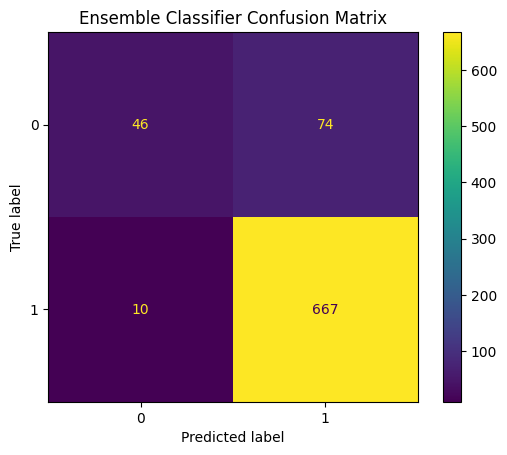

In [533]:
# Create confusion matrix
ensemble_cm_text = confusion_matrix(y_test, y_pred, labels=ensemble.classes_)
# Create confusion matrix display object
ensemble_cm = ConfusionMatrixDisplay(ensemble_cm_text, display_labels=ensemble.classes_)
# Plot confusion matrix
ensemble_cm.plot()
# Set title for confusion matrix plot
ensemble_cm.ax_.set_title("Ensemble Classifier Confusion Matrix")


Code Reuse Session 3

In [534]:
# Get unique classes from test set
unique_classes = sorted(y_test.unique())
# Create class labels for classification report
target_names = [f"Class {cls}" for cls in unique_classes]
# Print detailed classification report
print("classification report \n", classification_report(y_test, y_pred))

classification report 
               precision    recall  f1-score   support

           0       0.82      0.38      0.52       120
           1       0.90      0.99      0.94       677

    accuracy                           0.89       797
   macro avg       0.86      0.68      0.73       797
weighted avg       0.89      0.89      0.88       797



Code Reuse Session 3

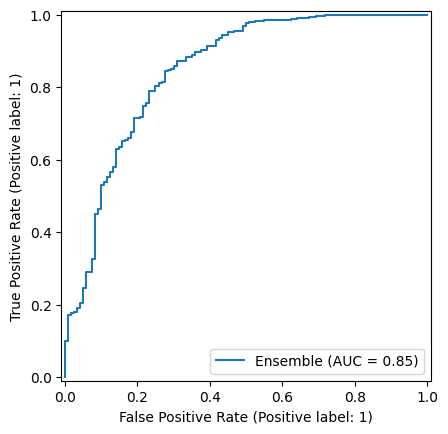

In [535]:
# Import ROC curve display
from sklearn.metrics import RocCurveDisplay
# Create and plot ROC curve for ensemble classifier
ensemble_roc_auc = RocCurveDisplay.from_estimator(ensemble, x_test, y_test, name="Ensemble")

Code Reuse Session 3

In [536]:
# Read survival period dataset
sur_m = pd.read_csv("survival_period.csv")
# Display first 5 rows
sur_m.head()
# Display dataset information
sur_m.info()
# Display statistical summary
sur_m.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     601 non-null    int64  
 1   Sex                     601 non-null    int64  
 2   T_Stage                 601 non-null    int64  
 3   N_Stage                 601 non-null    int64  
 4   6th_Stage               601 non-null    int64  
 5   Differentiated          601 non-null    int64  
 6   Grade                   601 non-null    int64  
 7   A_Stage                 601 non-null    int64  
 8   Tumor_Size              601 non-null    int64  
 9   Estrogen_Status         601 non-null    int64  
 10  Progesterone_Status     601 non-null    int64  
 11  Regional_Node_Examined  601 non-null    float64
 12  Reginol_Node_Positive   601 non-null    int64  
 13  Survival_Months         601 non-null    int64  
 14  Mortality_Status        601 non-null    in

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.0
mean,55.049917,0.998336,1.063228,0.856905,2.093178,0.657238,2.397671,0.945092,37.171381,0.820300,0.665557,15.026622,7.246256,46.487521,0.0
std,9.723383,0.040791,0.838250,0.846260,1.434563,0.803525,0.632399,0.227991,24.086488,0.384258,0.472188,8.490541,7.299036,23.419655,0.0
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.0
25%,48.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,20.000000,1.000000,0.000000,9.000000,2.000000,28.000000,0.0
50%,56.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,14.000000,4.000000,45.000000,0.0
75%,63.000000,1.000000,2.000000,2.000000,4.000000,1.000000,3.000000,1.000000,50.000000,1.000000,1.000000,20.000000,10.000000,61.000000,0.0
max,69.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,57.000000,46.000000,102.000000,0.0


Code Reuse Session 3

In [537]:
# Create feature matrix X by dropping target column
x = sur_m.drop(columns=["Survival_Months"])
# Create target vector y for survival months
y = sur_m["Survival_Months"]
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Code Reuse Session 3

In [538]:
# # Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# # Create Decision Tree Regressor object
# DT_regressor = DecisionTreeRegressor()
# # Fit the model to training data
# DT_regressor.fit(x_train, y_train)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 1. Create a better Decision Tree with hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8,10,12],
    'criterion': ['squared_error', 'absolute_error']
}

# 2. Create base model
dt = DecisionTreeRegressor(random_state=42)

# 3. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 4. Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 5. Fit the grid search
grid_search.fit(x_train_scaled, y_train)

# 6. Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)  # Negative MSE to positive

# 7. Make predictions with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)



Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 15}
Best cross-validation score: 510.4684475346306


Code Reuse Session 3

In [539]:
# Make predictions on test set
# y_pred = DT_regressor.predict(x_test)

Code Reuse Session 3

In [540]:
# Import metrics for regression evaluation
from sklearn import metrics
# Calculate and print Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# Calculate and print Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# Calculate and print R-squared score
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 17.99671489425164
MSE: 533.1419745427826
R2: -0.002879188254177212


Code Reuse Session 3

In [541]:
# # Import tree visualization tools
# from sklearn import tree
# from matplotlib import pyplot as plt
# # Create large figure for full tree visualization
# tree_figure = plt.figure(figsize=(200,200))
# # Plot complete decision tree
# GT_graph = tree.plot_tree(grid_search,
#     feature_names=x_train.columns,
#     filled=True,
#     rounded=True,
#     fontsize=14
# )


Code Reuse Session 3

In [542]:
# Save full tree visualization to SVG file
# tree_figure.savefig("decision_tree.svg")


Code Reuse Session 3

In [543]:
# # Create figure for pruned tree visualization
# Pruned_Tree_figure = plt.figure(figsize=(20,20))
# # Plot pruned decision tree (max_depth=3)
# Pruned_DT_Graph = tree.plot_tree(grid_search, feature_names=list(x_train.columns), filled=True, max_depth=3)